#  Задача 1.  Вводное задание.



Вектора х1 и у1 из архива дают значения некоторой функции $f(x) .$ Постройте на графике, используя библиотечные функции:

(a) Интерполяционный Лагранжев многочлен.

(b) Интерполяционный кубический сплайн (CubicSpline).

(c) Монотонный кубический интерполянт (PchipInterpolator).

(d)  Аппроксимацию полиномами, используя функции np. polyfit и np.polyval.

Чтобы прочитать из архива данные, используйте следующий код:

C:\Users\wowsl\AppData\Local\Temp\ipykernel_9236\4241313384.py:17: RankWarning: Polyfit may be poorly conditioned
  y_4 = np.polyfit(x, y, 19)


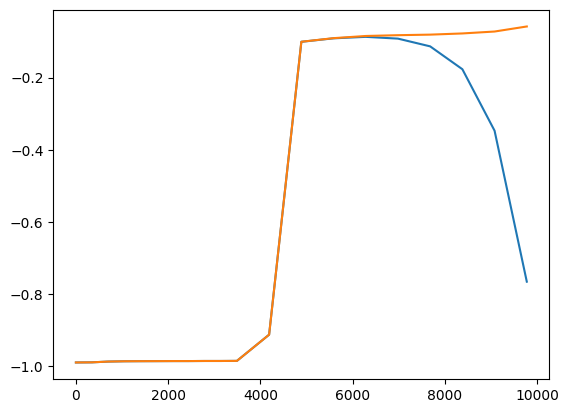

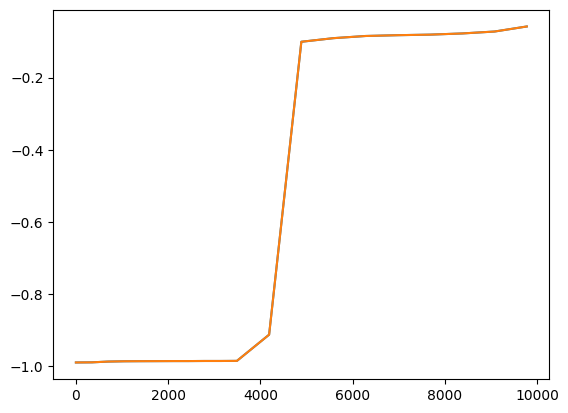

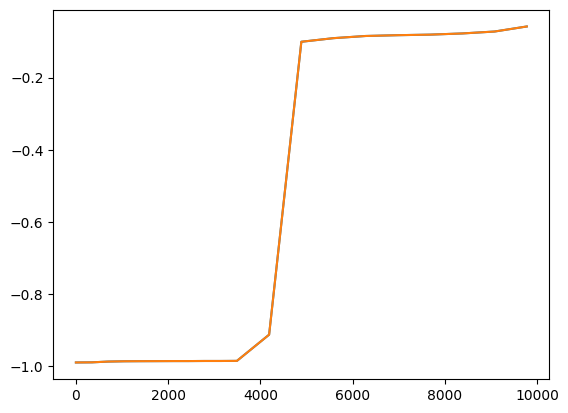

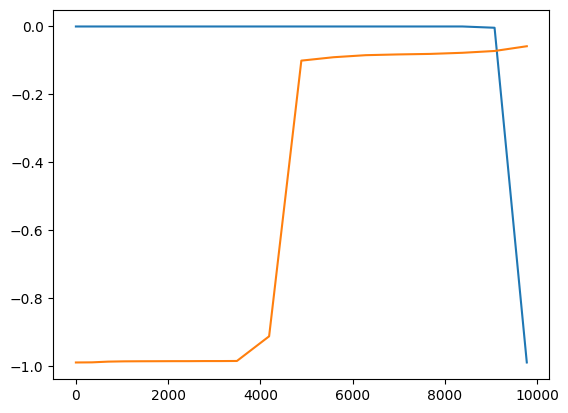

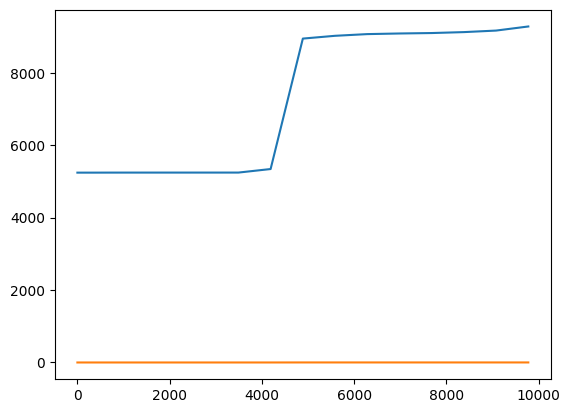

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import PchipInterpolator


with np.load('data_interp.npz') as data:
  x, y = data['x1'], data['y1']
poly_1 = lagrange(x, y)
poly_2 = CubicSpline(x, y)
poly_3 = PchipInterpolator(x, y)

y_1 = poly_1(x)
y_2 = poly_2(x)
y_3 = poly_3(x)
y_4 = np.polyfit(x, y, 19)
y_5 = np.polyval(x, y)



plt.plot(x,y_1)
plt.plot(x,y)
plt.show()
plt.plot(x,y_2)
plt.plot(x,y)
plt.show()
plt.plot(x,y_3)
plt.plot(x,y)
plt.show()
plt.plot(x,y_4)
plt.plot(x,y)
plt.show()
plt.plot(x,y_5)
plt.plot(x,y)
plt.show()





# Задача 2. Интерполяция полиномом Лагранжа.



Допишите класс, который конструирует интерполяционный полином Лагранжа, проходящий через точки, заданные как `xk` и `yk`.

In [133]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.

    Given a set of pairs ``(x_k, y_k)``, construct
    a Lagrange polynomial ``f(x)``, such that

    .. math::

        f(x_k) = y_k   for k =0, ..., n-1

    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates

    Attributes
    ----------
    __call__

    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)

    def __call__(self, x):
        """Evaluate the interpolator at a given point.

        Parameters
        ----------
        x : float

        Returns
        -------
        the value of the interpolator at ``x``.
        """
        ln = np.zeros(len(self.xk)) + 1
        for i in range(len(self.xk)):
            for j in range(len(self.xk)):
                if (i!=j):
                    ln[i] = (x - self.xk[j])/(self.xk[i]-self.xk[j])*ln[i]
        
        Ln = np.sum(ln*self.yk)
        return Ln
        raise NotImplementedError()

In [135]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

# Задача 3. Феномер Рунге



Рассмотрим функцию Рунге, $y = 1/(1 + 25x^2)$. Интерполируйте эту функцию на интервале $x\in [-2, 2]$, используя полином Лагранжа с $m=3, 5, 7, 11$. Используйте равномерную сетку. Нарисуйте результат интерполяции вместе с исходной функцией на одном графике.

3
5
7
11


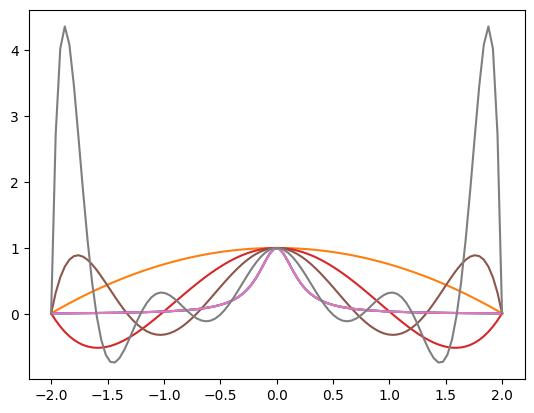

In [160]:
def func(x):
    return 1/(1+25*x**2)

def lagr(x,m,x_0):
    ln = np.zeros(m) + 1
    for i in range(m):
        for j in range(m):
            if (i!=j):
                ln[i] = (x_0 - x[j])/(x[i]-x[j])*ln[i] 
    Ln = np.sum(ln*y)
    return Ln


for m in range(3,13,2):
    if (m==9):
        continue
    x = np.linspace(-2,2,m)
    y = [func(i) for i in x]
    x_0 = np.linspace(-2,2,100)
    y_0_interpol = [lagr(x,m,i) for i in x_0]
    y_0_real = [func(i) for i in x_0]
    print(m)
    plt.plot(x_0, y_0_real, x_0, y_0_interpol)




Допишите функцию, которая возвращает узлы Чебышева.

In [241]:
def cheb_nodes(n, a=-1, b=1):
    if ((a ==- 1) and (b == 1)):
        coef = np.zeros(n+1)
        coef[-1] = 1
        cheb = np.polynomial.chebyshev.Chebyshev(coef)
        
        return cheb.roots()
    else:
        coef = [1/2*(a+b) + 1/2*(b-a)*np.cos((2*k-1)/(2*(n))*np.pi) for k in range(1,n+1)]
        return sorted(coef, reverse = False)


In [213]:
nodes_11 = cheb_nodes(11)
nodes_11 = np.asarray(nodes_11)
assert (nodes_11[1:] > nodes_11[:-1]).all()

from scipy.special import roots_chebyt
nodes, weights = roots_chebyt(5)

assert_allclose(cheb_nodes(5),
                nodes, atol=1e-14)

assert_allclose(cheb_nodes(5, a=-1, b=3),
                nodes*2 + 1, atol=1e-14)

[-9.89821442e-01 -9.09631995e-01 -7.55749574e-01 -5.40640817e-01
 -2.81732557e-01 -1.42186367e-17  2.81732557e-01  5.40640817e-01
  7.55749574e-01  9.09631995e-01  9.89821442e-01]
[-9.51056516e-01 -5.87785252e-01  7.37692017e-17  5.87785252e-01
  9.51056516e-01]


Повторите интерполяцию Лагранжа функции Рунге с помощью узлов Чебышева. Постройте интерполянты.
Также постройте интерполяцию кубическим сплайном тех же данных (`scipy.interpolate.CubicSpline`).
Сравните величину явления Рунге для равномерной сетки и сетки Чебышева. Демонстрирует ли интерполяция сплайнами феномен Рунге?


3
5
7
11


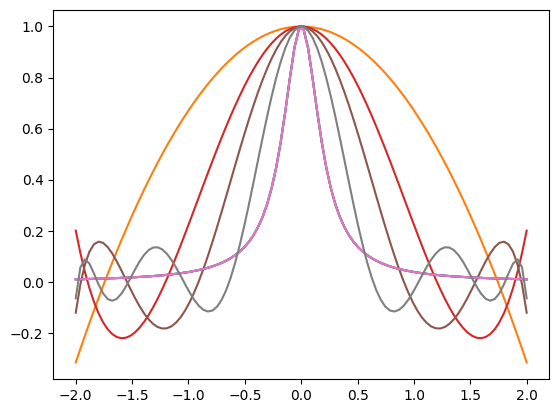

In [214]:
def func(x):
    return 1/(1+25*x**2)

def lagr(x,m,x_0):
    ln = np.zeros(m) + 1
    for i in range(m):
        for j in range(m):
            if (i!=j):
                ln[i] = (x_0 - x[j])/(x[i]-x[j])*ln[i] 
    Ln = np.sum(ln*y)
    return Ln


for m in range(3,13,2):
    if (m==9):
        continue
    x = cheb_nodes(m,-2,2)
    y = [func(i) for i in x]
    x_0 = np.linspace(-2,2,100)
    y_0_interpol = [lagr(x,m,i) for i in x_0]
    y_0_real = [func(i) for i in x_0]
    print(m)
    plt.plot(x_0, y_0_real, x_0, y_0_interpol)






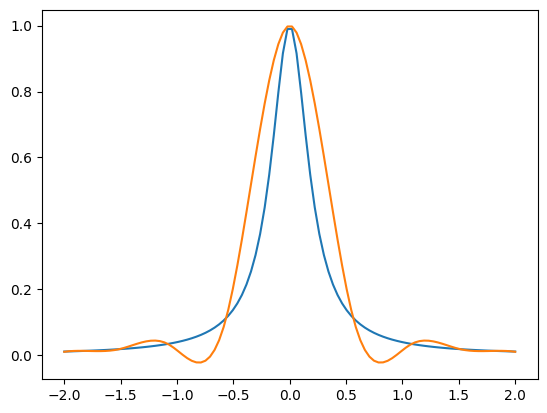

In [216]:
poly_2 = CubicSpline(x, y)
y_2 = poly_2(x_0)
plt.plot(x_0, y_0_real, x_0,y_2)

Другим известным трудным тестом для интерполяции является следующая периодическая функция:

$u(x)=\frac{\sqrt{\varepsilon(2+\varepsilon)}}{2 \pi(1+\varepsilon-\cos x)}, \quad-\pi \leq x \leq \pi, \quad \varepsilon=0.21  $

Проведите аналогичные вычисления и постройте графики для неё.

3
5
7
11


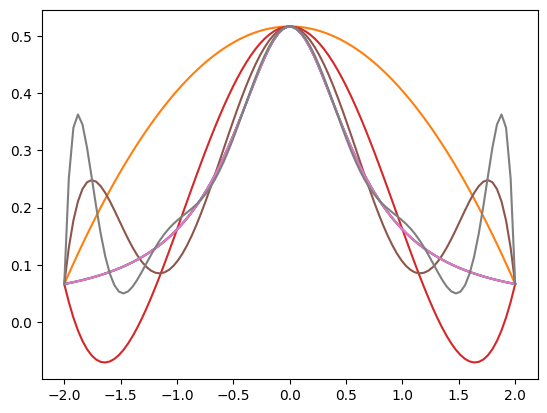

3
5
7
11


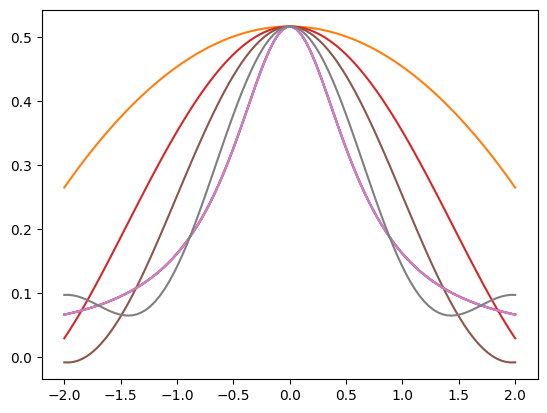

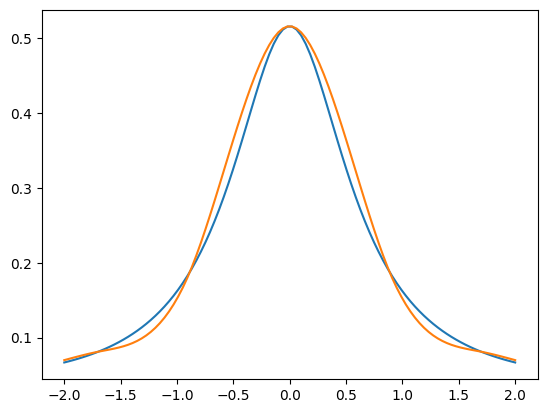

In [220]:
def func(x):
    eps = 0.21
    return (eps*(2+eps))**0.5/(2*np.pi*(1+eps-np.cos(x)))

def lagr(x,m,x_0):
    ln = np.zeros(m) + 1
    for i in range(m):
        for j in range(m):
            if (i!=j):
                ln[i] = (x_0 - x[j])/(x[i]-x[j])*ln[i] 
    Ln = np.sum(ln*y)
    return Ln



for m in range(3,13,2):
    if (m==9):
        continue
    x = np.linspace(-2,2,m)
    y = [func(i) for i in x]
    x_0 = np.linspace(-2,2,100)
    y_0_interpol = [lagr(x,m,i) for i in x_0]
    y_0_real = [func(i) for i in x_0]
    print(m)
    plt.plot(x_0, y_0_real, x_0, y_0_interpol)

plt.show()


for m in range(3,13,2):
    if (m==9):
        continue
    x = cheb_nodes(m,-np.pi,np.pi)
    y = [func(i) for i in x]
    x_0 = np.linspace(-2,2,100)
    y_0_interpol = [lagr(x,m,i) for i in x_0]
    y_0_real = [func(i) for i in x_0]
    print(m)
    plt.plot(x_0, y_0_real, x_0, y_0_interpol)
plt.show()
poly_2 = CubicSpline(x, y)
y_2 = poly_2(x_0)
plt.plot(x_0, y_0_real, x_0,y_2)


# Задача 4. Полиномы Чебышева.

Постройте интерполяцию функций

$$
y_{1}(x)=\sin (6 x)+\sin \left(60 e^{x}\right), y_{2}(x)=\frac{1}{1+1000(x+0.5)^{2}}+\frac{1}{\sqrt{1+1000(x-0.5)^{2}}}
$$

на отрезке $[-1,1]$ полиномами Чебышева. Постройте зависимость ошибки приближения от количества узлов. Сколько узлов нужно удержать в каждом из этих случаев для получения достаточно точного приближения?

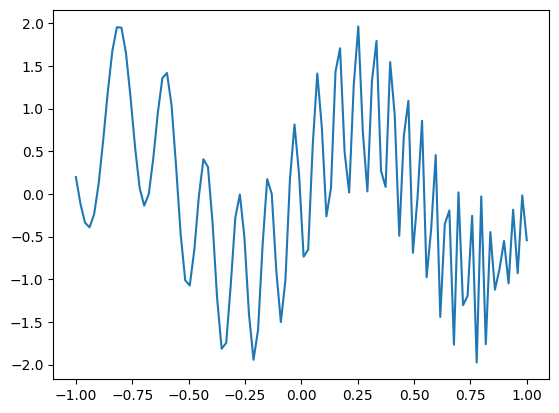

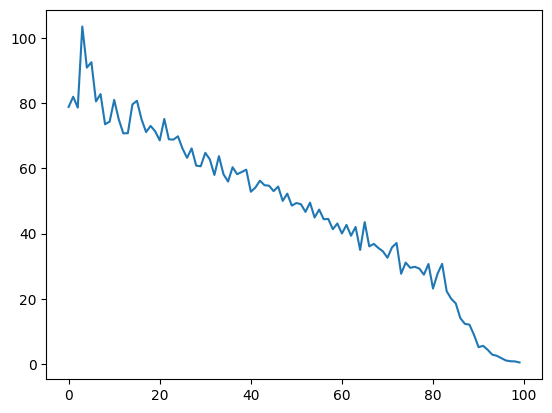

In [258]:
def func1(x):
    return np.sin(6*x) + np.sin(60*np.exp(x))

def func2(x):
    return 1/(1+1000*(x+0.5)**2) + 1/(1+1000*(x-0.5)**2)**0.5


def lagr(x,m,x_0):
    ln = np.zeros(m) + 1
    for i in range(m):
        for j in range(m):
            if (i!=j):
                ln[i] = (x_0 - x[j])/(x[i]-x[j])*ln[i] 
    Ln = np.sum(ln*y)
    return Ln
n = 100
err = np.zeros(n)

for m in range(n):
    x = cheb_nodes(m,-1,1)
    y = [func1(i) for i in x]
    x_0 = np.linspace(-1,1,100)
    y_0_interpol = [lagr(x,m,i) for i in x_0]
    y_0_real = [func1(i) for i in x_0]
    
    if (m==0):
        plt.plot(x_0, y_0_real)
        plt.show()
    for i in range(len(x_0)):
        err[m] += np.sum(abs(y_0_real[i]-y_0_interpol[i]))
m_arr = np.linspace(0,n-1,n)

plt.show()
plt.plot(m_arr,err);
plt.show()


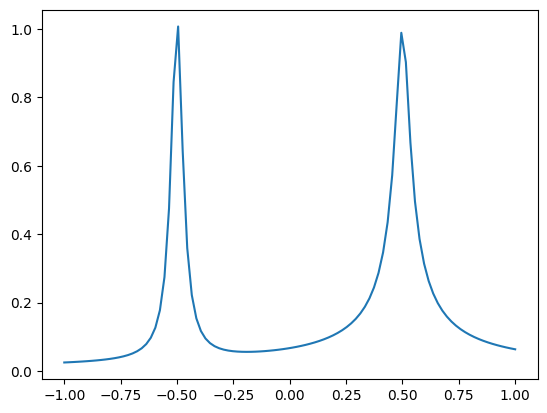

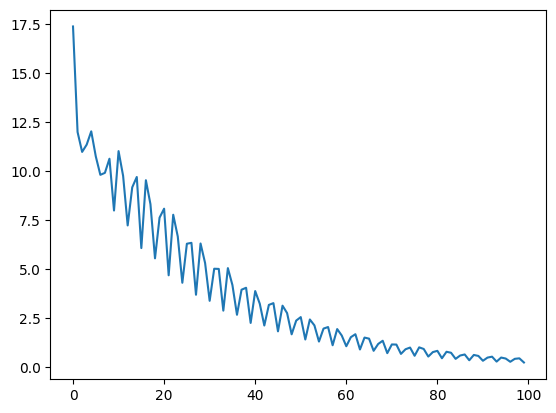

In [259]:
n = 100
err = np.zeros(n)

for m in range(n):
    x = cheb_nodes(m,-1,1)
    y = [func2(i) for i in x]
    x_0 = np.linspace(-1,1,100)
    y_0_interpol = [lagr(x,m,i) for i in x_0]
    y_0_real = [func2(i) for i in x_0]
    if (m==0):
        plt.plot(x_0, y_0_real)
        plt.show()
    for i in range(len(x_0)):
        err[m] += np.sum(abs(y_0_real[i]-y_0_interpol[i]))
m_arr = np.linspace(0,n-1,n)
plt.show()
plt.plot(m_arr,err);

plt.show()

# Задача 5. Приближение разными функциями.

Вектора х4 и у4 из архива дают значения некоторой функции на равномерной сетке на отрезке [-0.75, 0.75]. Используя scipy . optimize.curve_fit, постройте интерполяцию функции $y(x)$ функциями вида

$$
y_{1}(x)=p_{0}+p_{1} x+p_{2} x^{2}+p_{3} x^{3}+p_{4} x^{4}+p_{5} x^{5}, y_{2}(x)=\frac{p_{0}+p_{1} x+p_{2} x^{2}+p_{3} x^{3}}{1+q_{1} x+q_{2} x^{2}}
$$


Какая из этих формул лучше описывает $y(x)$ на заданном интервале? Постройте график экстраполяции $y(x)$ за пределы исходных данных. Можете ли вы угадать аналитическое выражение для $y(x) ?$

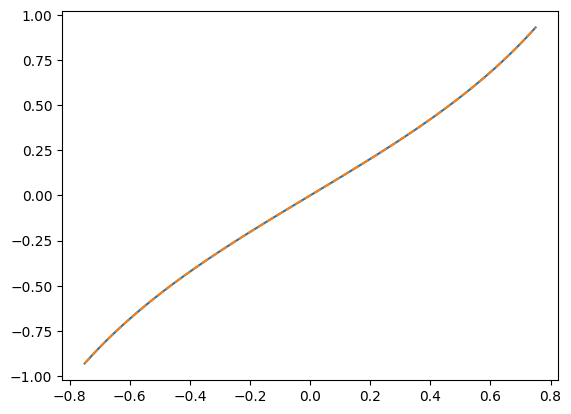

[]

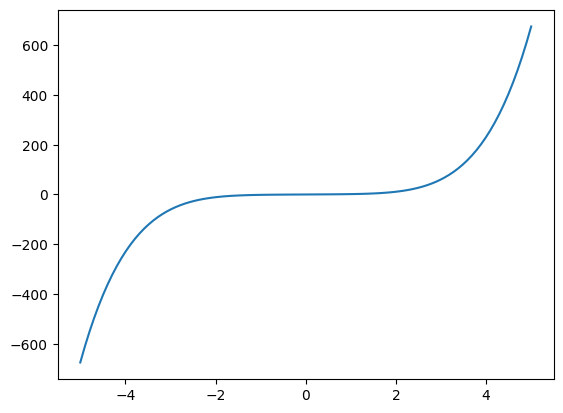

In [273]:
from scipy.optimize import curve_fit
def func1(x, p_0, p_1, p_2, p_3, p_4, p_5):
    return p_0 + p_1*x + p_2*x**2 + p_3*x**3 + p_4*x**4 + p_5*x**5


with np.load('data_interp.npz') as data:
  x, y = data['x4'], data['y4']


popt, pcov = curve_fit(func1, x, y)


plt.plot(x,y, x, func1(x,*popt), '--')
plt.show()
x_expend = np.linspace(-5,5, 100)
plt.plot(x_expend, func1(x_expend,*popt))


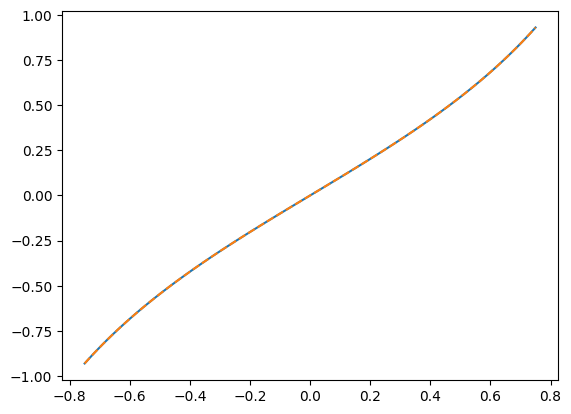

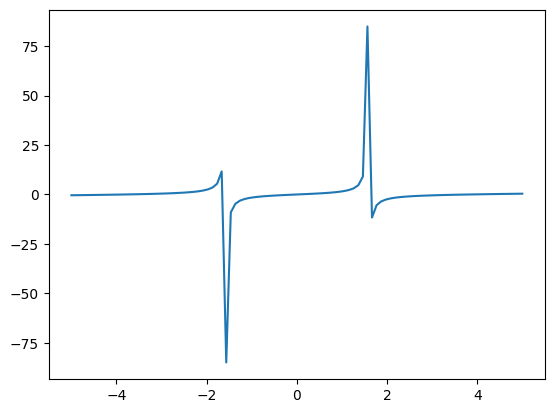

In [284]:
from scipy.optimize import curve_fit
def func2(x, p_0, p_1, p_2, p_3, q_1, q_2):
    return (p_0 + p_1*x + p_2*x**2 + p_3*x**3)/(1 + q_1*x + q_2*x**2)


with np.load('data_interp.npz') as data:
  x, y = data['x4'], data['y4']


popt, pcov = curve_fit(func2, x, y)


plt.plot(x,y, x, func2(x,*popt), '--')
plt.show()
x_expend = np.linspace(-5,5, 100)
plt.plot(x_expend, func2(x_expend,*popt))


# Задача 6. Аппроксимация узлов Чебышева.

Вектора х5 и у5 из архива задают некоторую функцию на равномерной сетке на отрезке $[-1,1] .$

Составьте соответствующий интерполяционный многочлен и постройте его график. Ожидаемо, получившийся интерполянт демонстрирует явление Рунге. Теперь проделайте замену переменной $x \rightarrow s$ по формуле $x=g(s)$, где
$$
g(s)=\frac{1}{53089}\left(40320 s+6720 s^{3}+3024 s^{5}+1800 s^{7}+1225 s^{9}\right)
$$

 функция, приближённо отображающая равномерную сетку в сетку узлов Чебышева. В новой переменной $s$, составьте интерполяционный многочлен $P(s) .$ Постройте график получившейся интерполяции исходной функции $P(s(x))$. Делает ли такая процедура явление Рунге менее выраженным?